In [45]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

In [25]:
# show all columns of dataframe
pd.set_option('display.max_columns', None)

In [26]:
INPUT_PATH = './data/'
train = pd.read_csv(os.path.join(INPUT_PATH, 'train.csv'))
test = pd.read_csv(os.path.join(INPUT_PATH, 'test.csv'))

train.shape, test.shape

((2000, 21), (1000, 21))

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [29]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [30]:
train['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [31]:
corr = train.corr()['price_range']
corr

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

<AxesSubplot:>

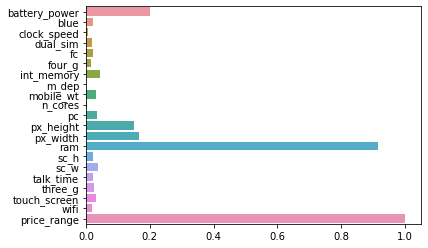

In [32]:
sns.barplot(x=np.abs(corr.values), y=corr.index)

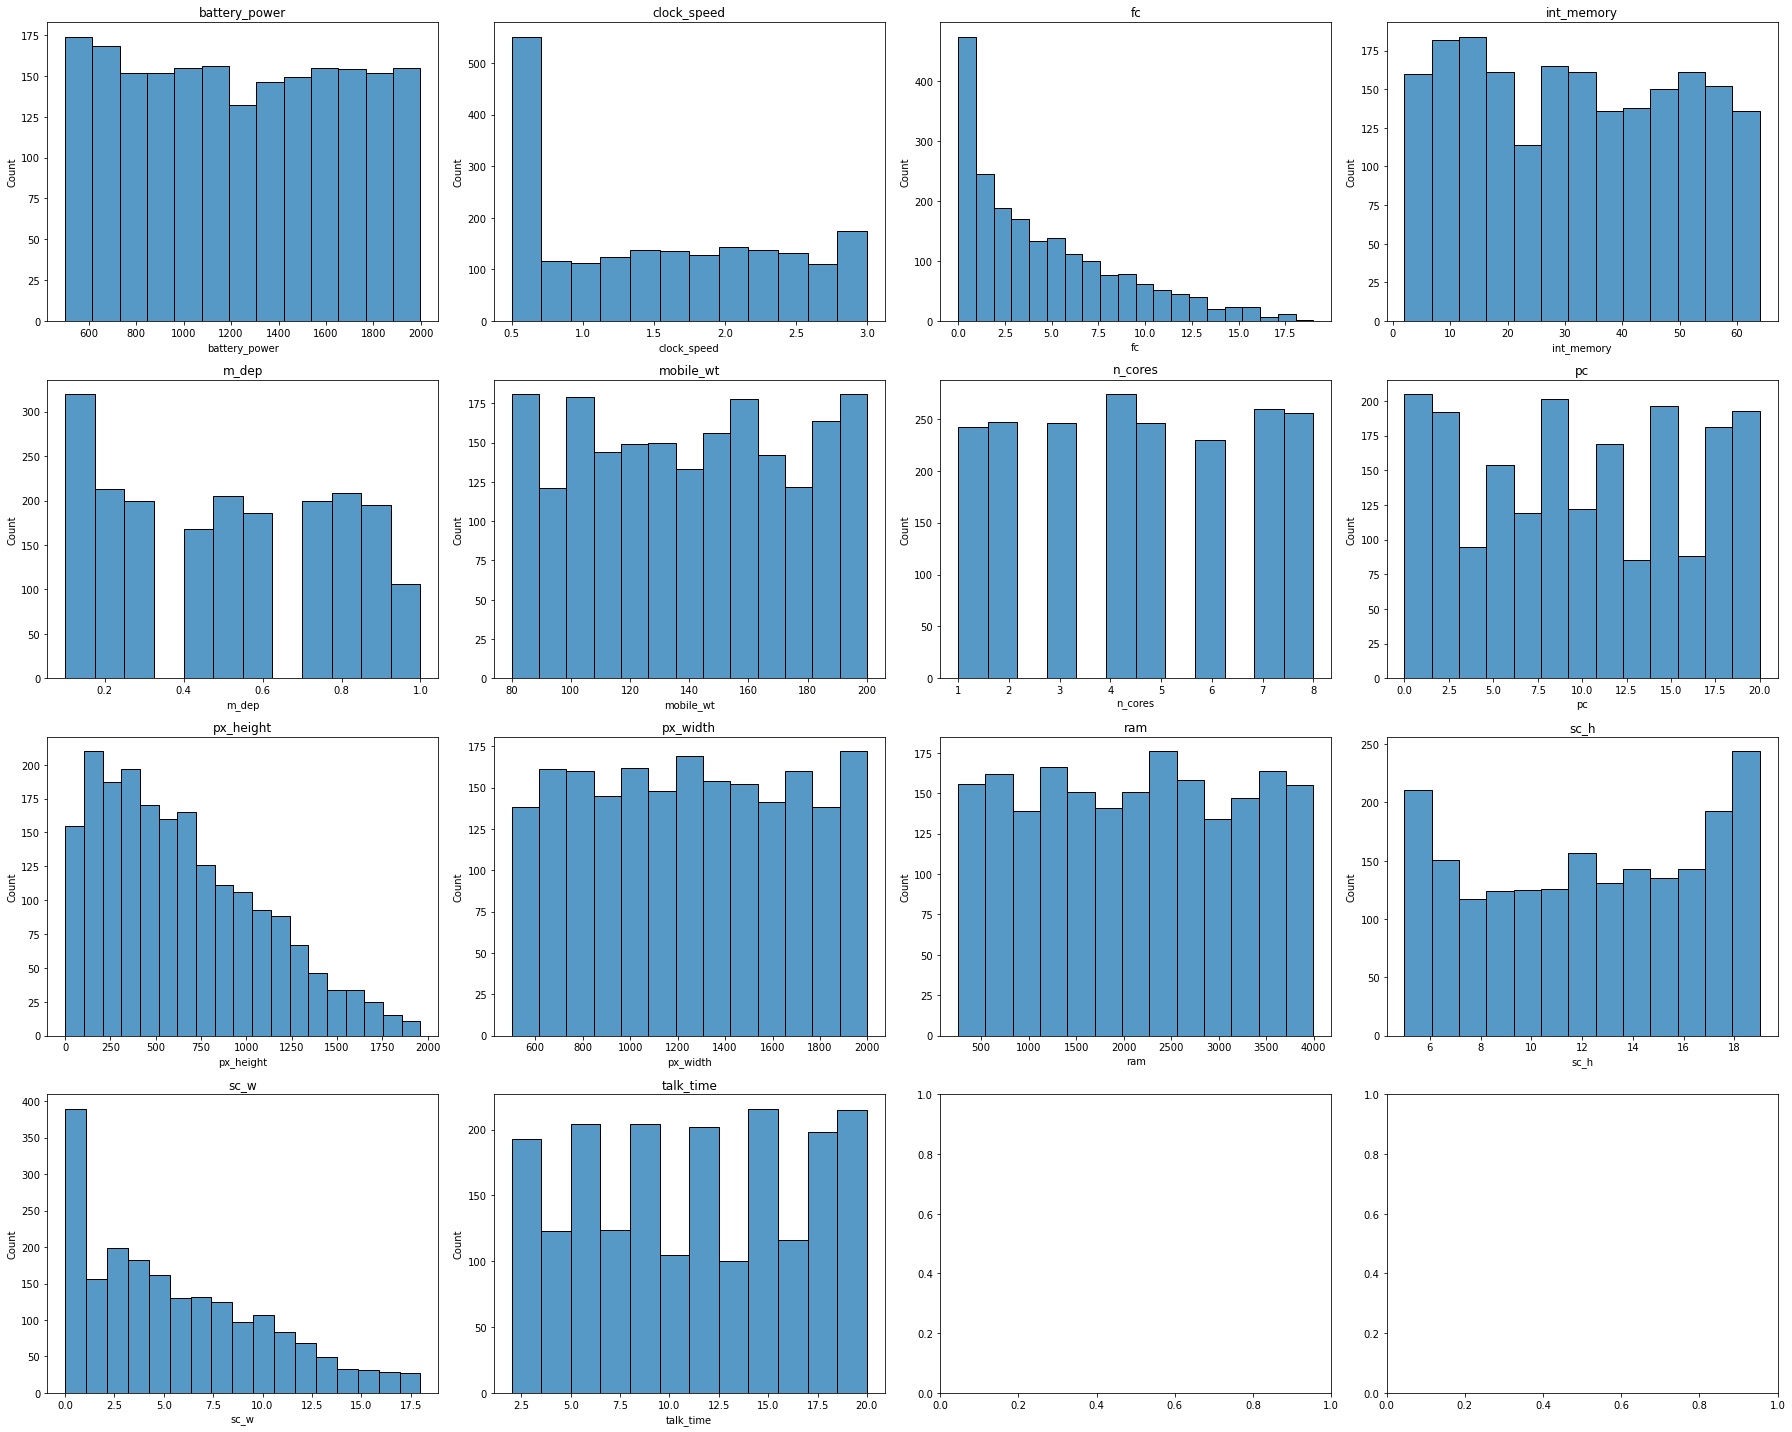

In [33]:
values = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

fig, axes = plt.subplots(4, 4, figsize=(25, 20))

for ax, col in zip(axes.ravel(), values):
    sns.histplot(train[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()

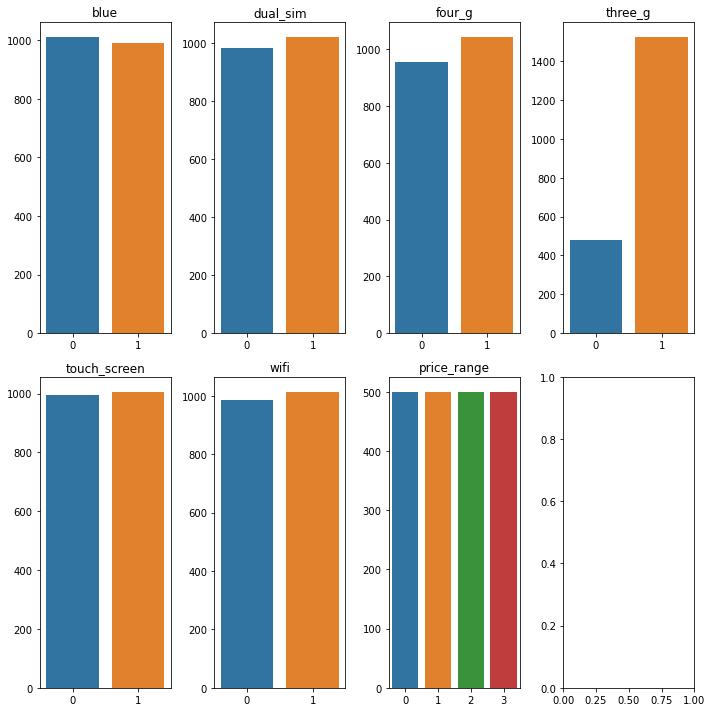

In [34]:
categories = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']

fig, axes = plt.subplots(2, 4, figsize=(10, 10))

for ax, col in zip(axes.ravel(), categories):
    counts = train[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_title(col)
plt.tight_layout()

In [35]:
prices = []
for i in range(4):
    prices.append(train.loc[train['price_range'] == i])

len(prices)

4

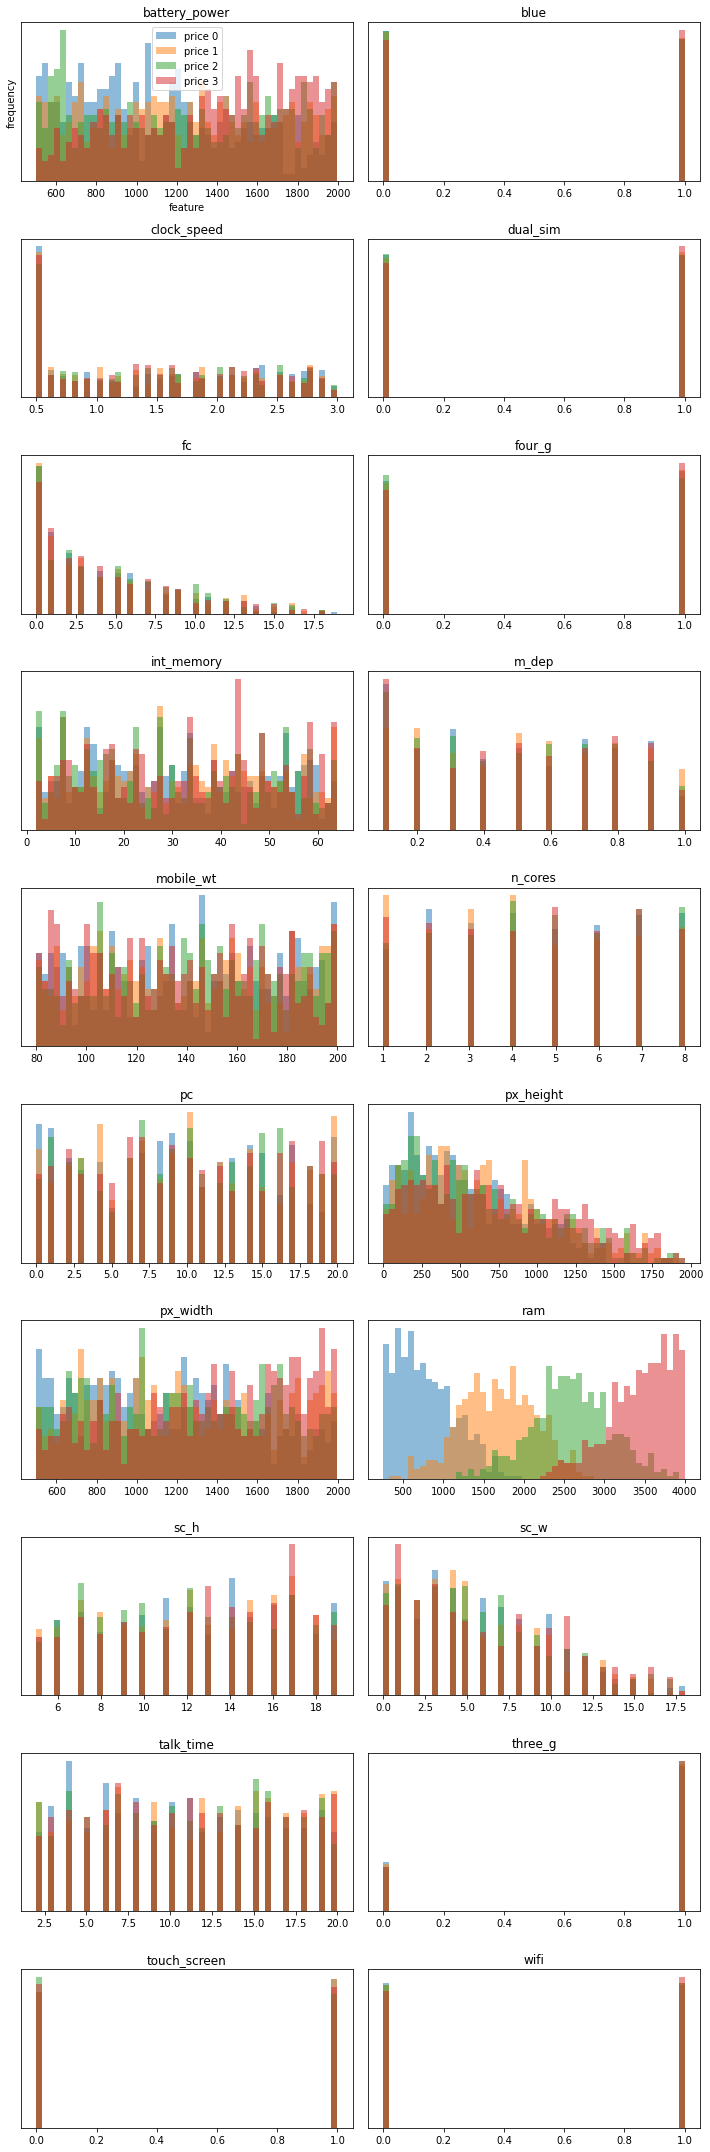

In [36]:
import mglearn

fig, axes = plt.subplots(10, 2, figsize=(10, 30))
ax = axes.ravel()

for i in range(train.shape[1] - 1):
    _, bins = np.histogram(train.iloc[:, i], bins=50)
    for j, price in enumerate(prices):
        # sns.histplot(price.iloc[:, i], bins=bins, ax=ax[i])
        ax[i].hist(price.iloc[:, i], bins=bins, alpha=.5)
    ax[i].set_title(train.columns[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('feature')
ax[0].set_ylabel('frequency')
ax[0].legend(['price 0', 'price 1', 'price 2', 'price 3'], loc='best')
fig.tight_layout()

In [37]:
X = train.drop(['price_range'], axis=1)
y = train['price_range']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=train['price_range'],
    random_state=0
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1500, 20), (1500,), (500, 20), (500,))

In [53]:
model = RandomForestClassifier(n_jobs=-1, random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('train set acc:', model.score(X_train, y_train))
print('test set acc:', model.score(X_test, y_test))
print(classification_report(y_test, pred))

score = cross_val_score(model, X, y, cv=5, scoring='roc_auc_ovo')
print(score.mean())
score = cross_val_score(model, X, y, cv=5, scoring='roc_auc_ovr')
print(score.mean())

train set acc: 1.0
test set acc: 0.88
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       125
           1       0.82      0.86      0.84       125
           2       0.84      0.82      0.83       125
           3       0.95      0.90      0.92       125

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500

0.9805316666666666
0.9805316666666666


In [51]:
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('train set acc:', model.score(X_train, y_train))
print('test set acc:', model.score(X_test, y_test))
print(classification_report(y_test, pred))

score = cross_val_score(model, X, y, cv=5, scoring='roc_auc_ovo')
print(score.mean())
score = cross_val_score(model, X, y, cv=5, scoring='roc_auc_ovr')
print(score.mean())

train set acc: 1.0
test set acc: 0.912
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       125
           1       0.87      0.94      0.90       125
           2       0.86      0.88      0.87       125
           3       0.97      0.89      0.92       125

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

0.986645
0.986645


In [50]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(n_jobs=-1)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print('train set acc:', model.score(X_train_scaled, y_train))
print('test set acc:', model.score(X_test_scaled, y_test))
print(classification_report(y_test, pred))

pipe = Pipeline([('scaler', scaler), ('model', model)])
score = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc_ovo')
print(score.mean())
score = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc_ovr')
print(score.mean())

train set acc: 0.9406666666666667
test set acc: 0.928
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       125
           1       0.89      0.89      0.89       125
           2       0.92      0.89      0.90       125
           3       0.96      0.98      0.97       125

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500

0.9909116666666666
0.9909116666666666


In [49]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print('train set acc:', model.score(X_train_scaled, y_train))
print('test set acc:', model.score(X_test_scaled, y_test))
print(classification_report(y_test, pred))

pipe = Pipeline([('scaler', scaler), ('model', model)])
score = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc_ovo')
print(score.mean())
score = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc_ovr')
print(score.mean())


train set acc: 0.6293333333333333
test set acc: 0.412
              precision    recall  f1-score   support

           0       0.50      0.63      0.56       125
           1       0.28      0.33      0.30       125
           2       0.32      0.30      0.31       125
           3       0.61      0.39      0.48       125

    accuracy                           0.41       500
   macro avg       0.43      0.41      0.41       500
weighted avg       0.43      0.41      0.41       500

0.6630533333333333
0.6630533333333333
